In [2]:
import pandas as pd 
import numpy as np

 Ex 1 . Caricare in un DataFrame Pandas il dataset contenuto del file “players1. csv” (separatore: “;”). Usarlo come TRAINING SET. Caricare in un altro # DataFrame Pandas il dataset contenuto del file “players2.csv” (separatore: “;”). Usare come opzione per il caricamento: encoding='ISO-8859-1'. Usare questo secondo dataset come TEST SET

In [3]:
training_set = pd.read_csv('players1.csv', encoding='ISO-8859-1', sep=';')
test_set = pd.read_csv('players2.csv', encoding ='ISO-8859-1', sep=';')

C:\Users\nicola.chinchella2\AppData\Local\Temp\ipykernel_8144\1990436556.py:1: DtypeWarning: Columns (203,205,206,207,217,218,221,222,233,234,236,237,239,240,244,245,247,262,279,286,287,291,292,294,296,298,299,300,301,304,305,306,311,312,366,379,394) have mixed types. Specify dtype option on import or set low_memory=False.
  training_set = pd.read_csv('players1.csv', encoding='ISO-8859-1', sep=';')


Ex 2 Applicare un modello di regressione lineare semplice tra le variabili “minutes” (input) e “value”
(output). Stampare il valore del MSE e dell’R2
.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = training_set['minutes'].values.reshape(-1, 1)
y_train = training_set['value'].values.reshape(-1, 1)
X_test = test_set['minutes'].values.reshape(-1, 1)
y_test = test_set['value'].values.reshape(-1, 1)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


reg = LinearRegression()

#Fit the training data
reg.fit(X_train,y_train)
#Predict the value from the minutes on the test data 
value_y_pred = reg.predict(X_test)

#Check how good the prediction is 
mse = mean_squared_error(y_test, value_y_pred)
r2 = r2_score(y_test, value_y_pred)

print('Beta_0', reg.intercept_)
print('Beta_1', reg.coef_)
print('mse', mse)
print('r2', r2)

X_train (2571, 1)
y_train (2571, 1)
X_test (73, 1)
y_test (73, 1)
Beta_0 [2037578.30647177]
Beta_1 [[5820.25583798]]
mse 337903920862793.06
r2 0.04369229667347729


Questions to improve understanding:

Q: If Beta_1 was negative, what would that imply about the relationship between minutes and value?

A: Given that Beta_1 reflects the rate of change of value given a change in minutes, a negative beta_1 would mean that with an increase of minutes the value decreases. 

Q: Suppose you add another feature to your model (e.g., sessions). How would that change the interpretation of Beta_1?

A: Adding another feature (like sessions) would indeed change the model structure to include a second coefficient that is a list of two, so that each value represent how much 'value' changes when 'minutes' for the first and 'sessions' for the second change. 

Q: Why might your R² score be so low, even if the model was trained correctly? Can you think of some possible reasons?

A: Yes, because there is no correlation between minutes and values. 

Q: If you wanted to lower the MSE of your model, what are some steps or techniques you might consider?

A: Add more features: Including other relevant features may capture more of the variance.
Transform the data: Applying transformations, like logarithmic or polynomial transformations, can sometimes help linearize relationships.
Use a different model: If the relationship is non-linear, models like decision trees, random forests, or polynomial regression might be better suited.

Q: If your MSE decreased significantly but your R² score didn’t improve much, what might that tell you about the model?

A: It would tell me that the model fits better the data given, hence the error is lower, howevere that 'minutes' does not predict variance in 'value' well. So the MSE tells me how well the model fits the data, however, nothing about the prediction from one to the other variance in itself. This is the task of R2. 

Ex 3 Visualizzare il dataset mediate scatterplot e la retta di regressione calcolata.

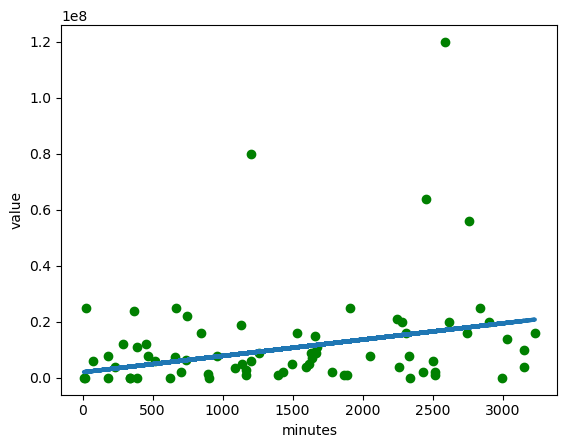

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.scatter(X_test, y_test, c='green')
plt.xlabel('minutes')
plt.ylabel('value')
plt.plot(X_test, value_y_pred, linewidth=3)
plt.show()

Ex 4 Visualizzare lo scatterplot dei residui.



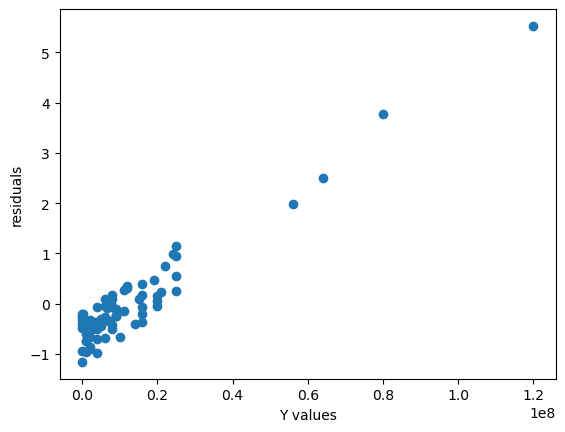

In [ ]:
from sklearn.preprocessing import StandardScaler


# you might want to scale to compare residals from different models with vastly different scales 
# also it can help identify outliers 

residuals = y_test - value_y_pred 
scaler = StandardScaler()
residuals = residuals.reshape(-1, 1)
residuals = scaler.fit_transform(residuals)

plt.xlabel('Y values')
plt.ylabel('residuals')
plt.scatter(y_test, residuals)
plt.show()

Ex 5 Ripetere l’esercizio considerando come variabili di input: “games”, “minutes”, “assists”,
“cards_yellow”, “cards_red”, “xg”, “npxg”, “xa” e come variabile di output “value”. 

mse 263628014759520.28
r22 0.25390181716897775
Beta_0 3203509.792909356
Beta_n [ -339774.43953722     6334.77792633   480495.92639092  -362915.95577453
   196105.61529386 -1463279.70811105  3144717.73026054  2110638.03514976]


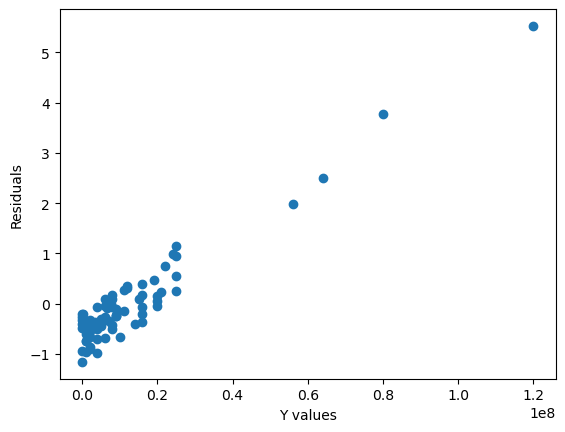

In [30]:
X_train2 = training_set[["games", "minutes", "assists", "cards_yellow", "cards_red", "xg", "npxg", "xa"]]
y_train2 = training_set['value']
X_test2 = test_set[["games", "minutes", "assists", "cards_yellow", "cards_red", "xg", "npxg", "xa"]]
y_test2 = test_set['value']

reg2 = LinearRegression()

reg2.fit(X_train2, y_train2)

y_pred2 = reg2.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print('mse', mse2)
print('r22', r22)
print('Beta_0', reg2.intercept_)
print('Beta_n', reg2.coef_)


residuals2 = y_test2 - y_pred2
residuals2 = residuals.reshape(-1, 1)
residuals2 = scaler.fit_transform(residuals2)

plt.xlabel('Y values')
plt.ylabel('Residuals')
plt.scatter(y_test2, residuals)
plt.show()

In general the result tells me that the error is very high, and that r2 is near 0 hence no correlation has been found. This is backed up from the fact that Beta0 is very high. Alsothe residuals plotting confirms the same. 

Ex 6 Applicare un modello di regressione logistica per riconoscere la posizione del giocatore
“position” a partire dalle variabili di: “games”, “minutes”, “assists”, “cards_yellow”, “cards_red”,
“xg”, “npxg”, “xa” , “value” (volendo, aggiungerne anche altre ritenute significative).

c:\Users\nicola.chinchella2\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.3150684931506849


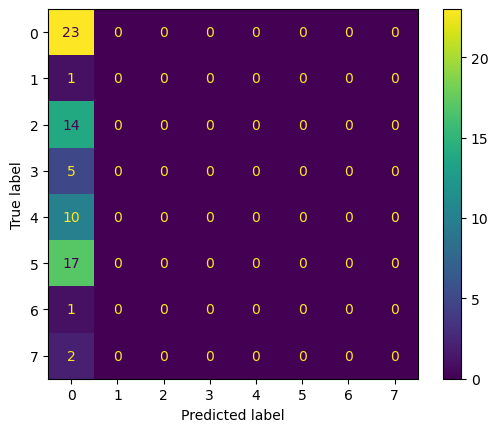

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X_train3 = training_set[["games", "minutes", "assists", "cards_yellow", "cards_red", "xg", "npxg", "xa", "value"]]
y_train3 = training_set['position'].values.reshape(-1, 1)
X_test3 = test_set[["games", "minutes", "assists", "cards_yellow", "cards_red", "xg", "npxg", "xa", 'value']]
y_test3 = test_set['position'].values.reshape(-1, 1)

Logistic = LogisticRegression()

Logistic.fit(X_train3, y_train3)

y_pred3 = Logistic.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred3)
cm = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)



print('accuracy', accuracy)
disp.plot()
plt.show()
